In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import image_render

In [2]:
example_image = '/media/mha114/Massimal/Vega_Sola/Transects/Otter/Sola_01/20220820_134500_Sola01b/Images/GX020060_04m56s878ms.jpg'

Example from https://stackoverflow.com/questions/62648862/how-can-i-change-the-hue-of-a-certain-area-with-opencv-python

In [4]:
# load image with alpha channel
img = cv2.imread(example_image, cv2.IMREAD_UNCHANGED)

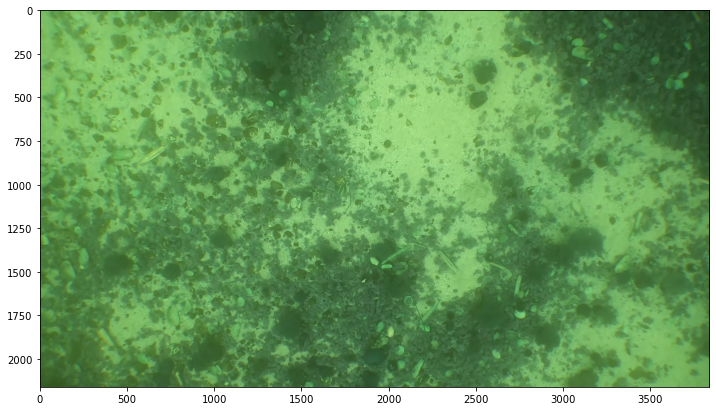

In [27]:
plt.figure(figsize=(12,9))
plt.imshow(img)
plt.show()

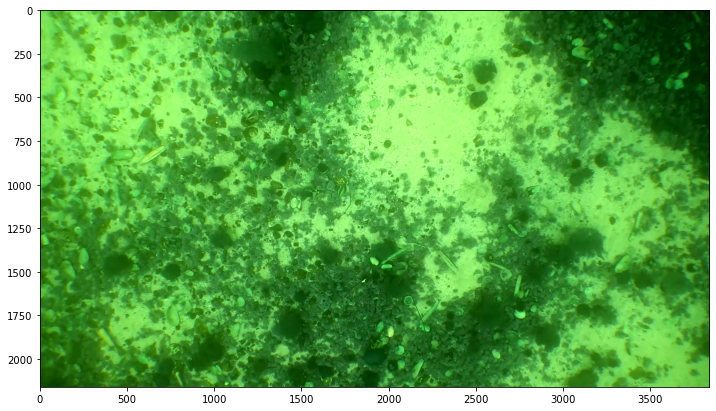

In [28]:
plt.figure(figsize=(12,9))
plt.imshow(image_render.percentile_stretch(img,separate_bands=False))

In [7]:
# convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)

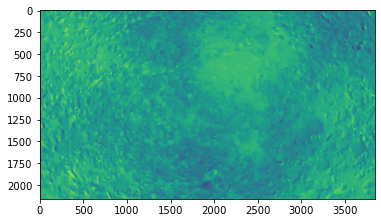

In [10]:
plt.imshow(h)

In [40]:
print(f'Hue: Min {np.min(h)}, Max {np.max(h)}, Mean {np.mean(h)}')

Hue: Min 41, Max 84, Mean 64.97336431809414


41

In [33]:
h_mod = h + 20

In [41]:
hsv_mod = cv2.merge([h_mod,s,v])

In [79]:
b_mod, g_mod, r_mod = cv2.split(cv2.cvtColor(hsv_mod, cv2.COLOR_HSV2BGR))

In [80]:
b_mod2 = b_mod*1.2
b_mod2[b_mod2>255] = 255
b_mod2 = np.uint8(b_mod*1.2)

In [81]:
rgb_mod2 = cv2.merge([b_mod2,g_mod,r_mod])

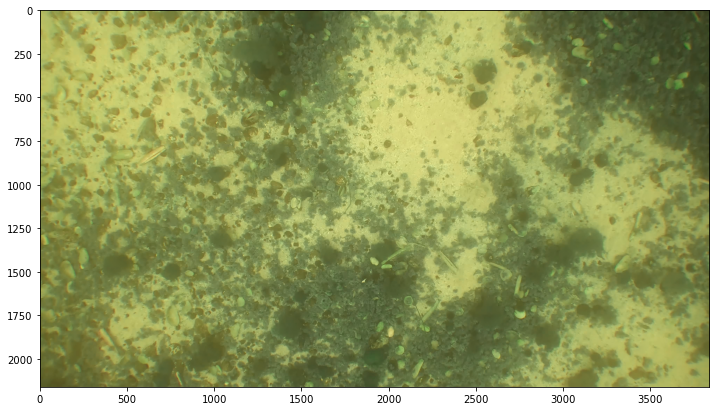

In [77]:
plt.figure(figsize=(12,9))
plt.imshow(rgb_mod)
plt.show()

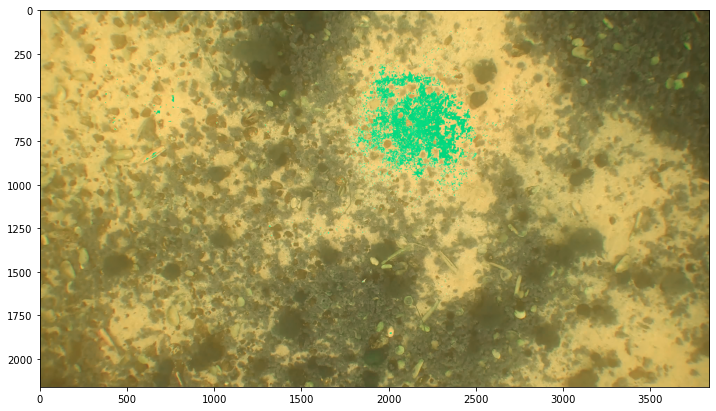

In [82]:
plt.figure(figsize=(12,9))
plt.imshow(rgb_mod2)
plt.show()

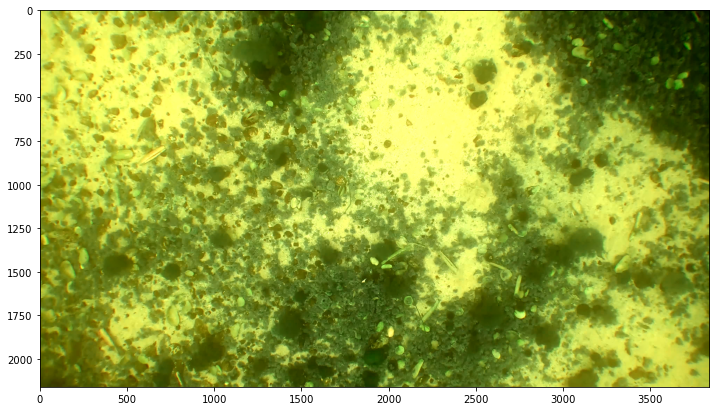

In [67]:
plt.figure(figsize=(12,9))
plt.imshow(image_render.percentile_stretch(rgb_mod,percentiles=(3,95),separate_bands=False))

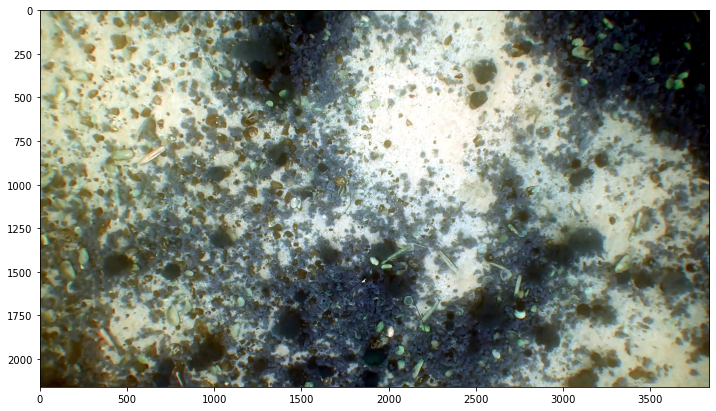

In [83]:
plt.figure(figsize=(12,9))
plt.imshow(np.uint8(image_render.percentile_stretch(rgb_mod,percentiles=(2,98),separate_bands=True)))

In [39]:
# for hue_shift in range(0,40,5):
#     h_mod = h + hue_shift
#     hsv_mod = cv2.merge([h_mod,s,v])
#     rgb_mod = cv2.cvtColor(hsv_mod, cv2.COLOR_HSV2BGR)
#     plt.figure(figsize=(12,9))
#     plt.imshow(image_render.percentile_stretch(rgb_mod,separate_bands=False))
#     plt.show()

In [101]:
tmp = image_render.percentile_stretch(rgb_mod,percentiles=(1,98),separate_bands=True)

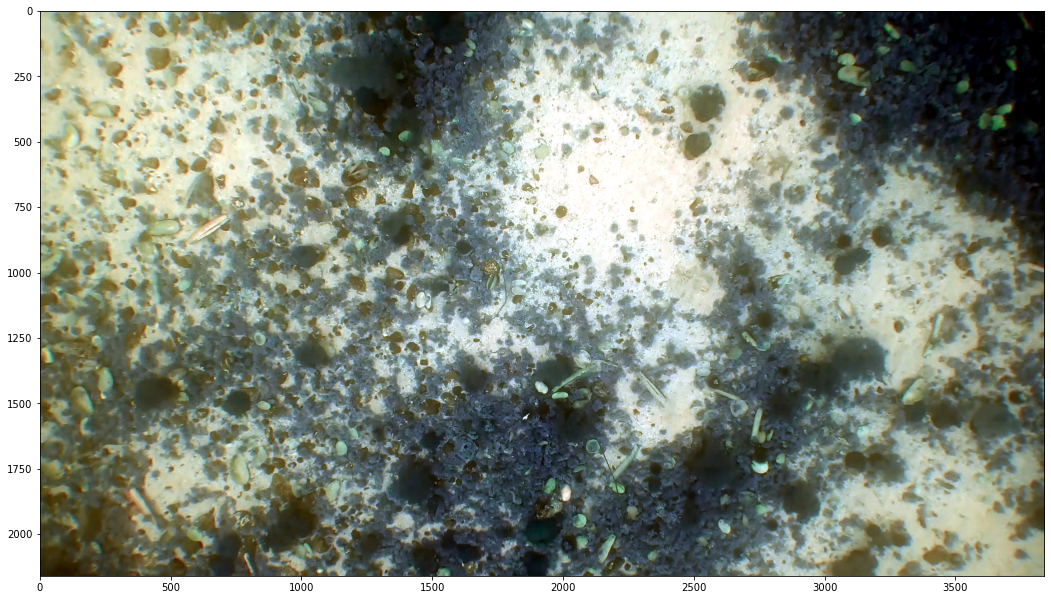

In [102]:
plt.figure(figsize=(18,12))
plt.imshow(np.uint8(tmp))

In [89]:
tmp2 = np.copy(tmp)

In [94]:
tmp2[:,:,2] = 0.7*tmp[:,:,2]

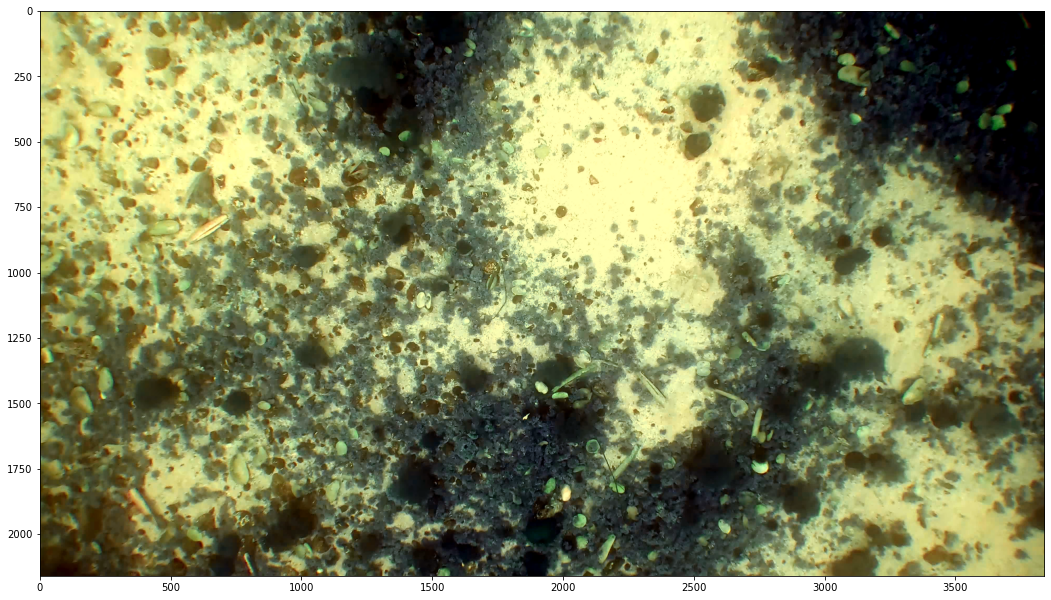

In [95]:
plt.figure(figsize=(18,12))
plt.imshow(np.uint8(tmp2))